In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.transforms as transforms
import matplotlib
import os

In [7]:
dname = os.getcwd() + '/data_v2_quotes/'
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts\\data_loading/data_v2_quotes/'

In [8]:
ACCURACY_trials = np.load(dname + 'ACCURACY_New_trials.npy')
acc_first_prop_trials = np.load(dname + 'Acc_first_prop_New_trials.npy')
acc_second_prop_trials = np.load(dname + 'acc_second_prop_New_trials.npy')
acc_third_prop_trials= np.load(dname + 'acc_third_prop_New_trials.npy')

In [9]:
n_sujs, n_trials = ACCURACY_trials.shape

acc_first_prop_trials.shape
acc_second_prop_trials.shape


(49, 128)

In [10]:
cmap = matplotlib.cm.get_cmap('Set1')
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

In [11]:
bloc_type_colors = {
    'training': cmap(norm(0)),
    'generalization': cmap(norm(.2))
}

Plotting function again, cannot get the import to work adequately

In [12]:
def plot_accuracy(subj_means, block_mean, block_se, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    # Average per bloc
    for i in range(n_trials):
        ax.errorbar(
            x = i,
            y = block_mean[i],
            yerr = block_se[i],
            color = cmap(norm(.2)),
            markersize = 5,
            marker = 'D',
            alpha = 1
        )
    
    # Individual data
    # for i in range(n_trials):
    #     ax.plot(
    #         np.ones(n_sujs) * i + np.random.normal(0, 0.05, (n_sujs)), 
    #         subj_means[:, i],
    #         color = cmap(norm(.2)),
    #         markersize = 3,
    #         marker = 'o',
    #         alpha = 0.5, 
    #         lw = 0
    #     )
    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )
    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Trial #')
    ax.set_ylabel('Accuracy')

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    plt.tight_layout()
    fig.savefig(fig_name)

Calculcate the mean for each trial across all levels of the hierarchy.

In [13]:
ACCURACY_M_SUJS = ACCURACY_trials
ACCURACY_M = np.mean(ACCURACY_M_SUJS, axis=0)
ACCURACY_SE = np.sqrt(ACCURACY_M*(1-ACCURACY_M))/np.sqrt(n_sujs)
ACCURACY_SE.shape

(128,)

Plotting

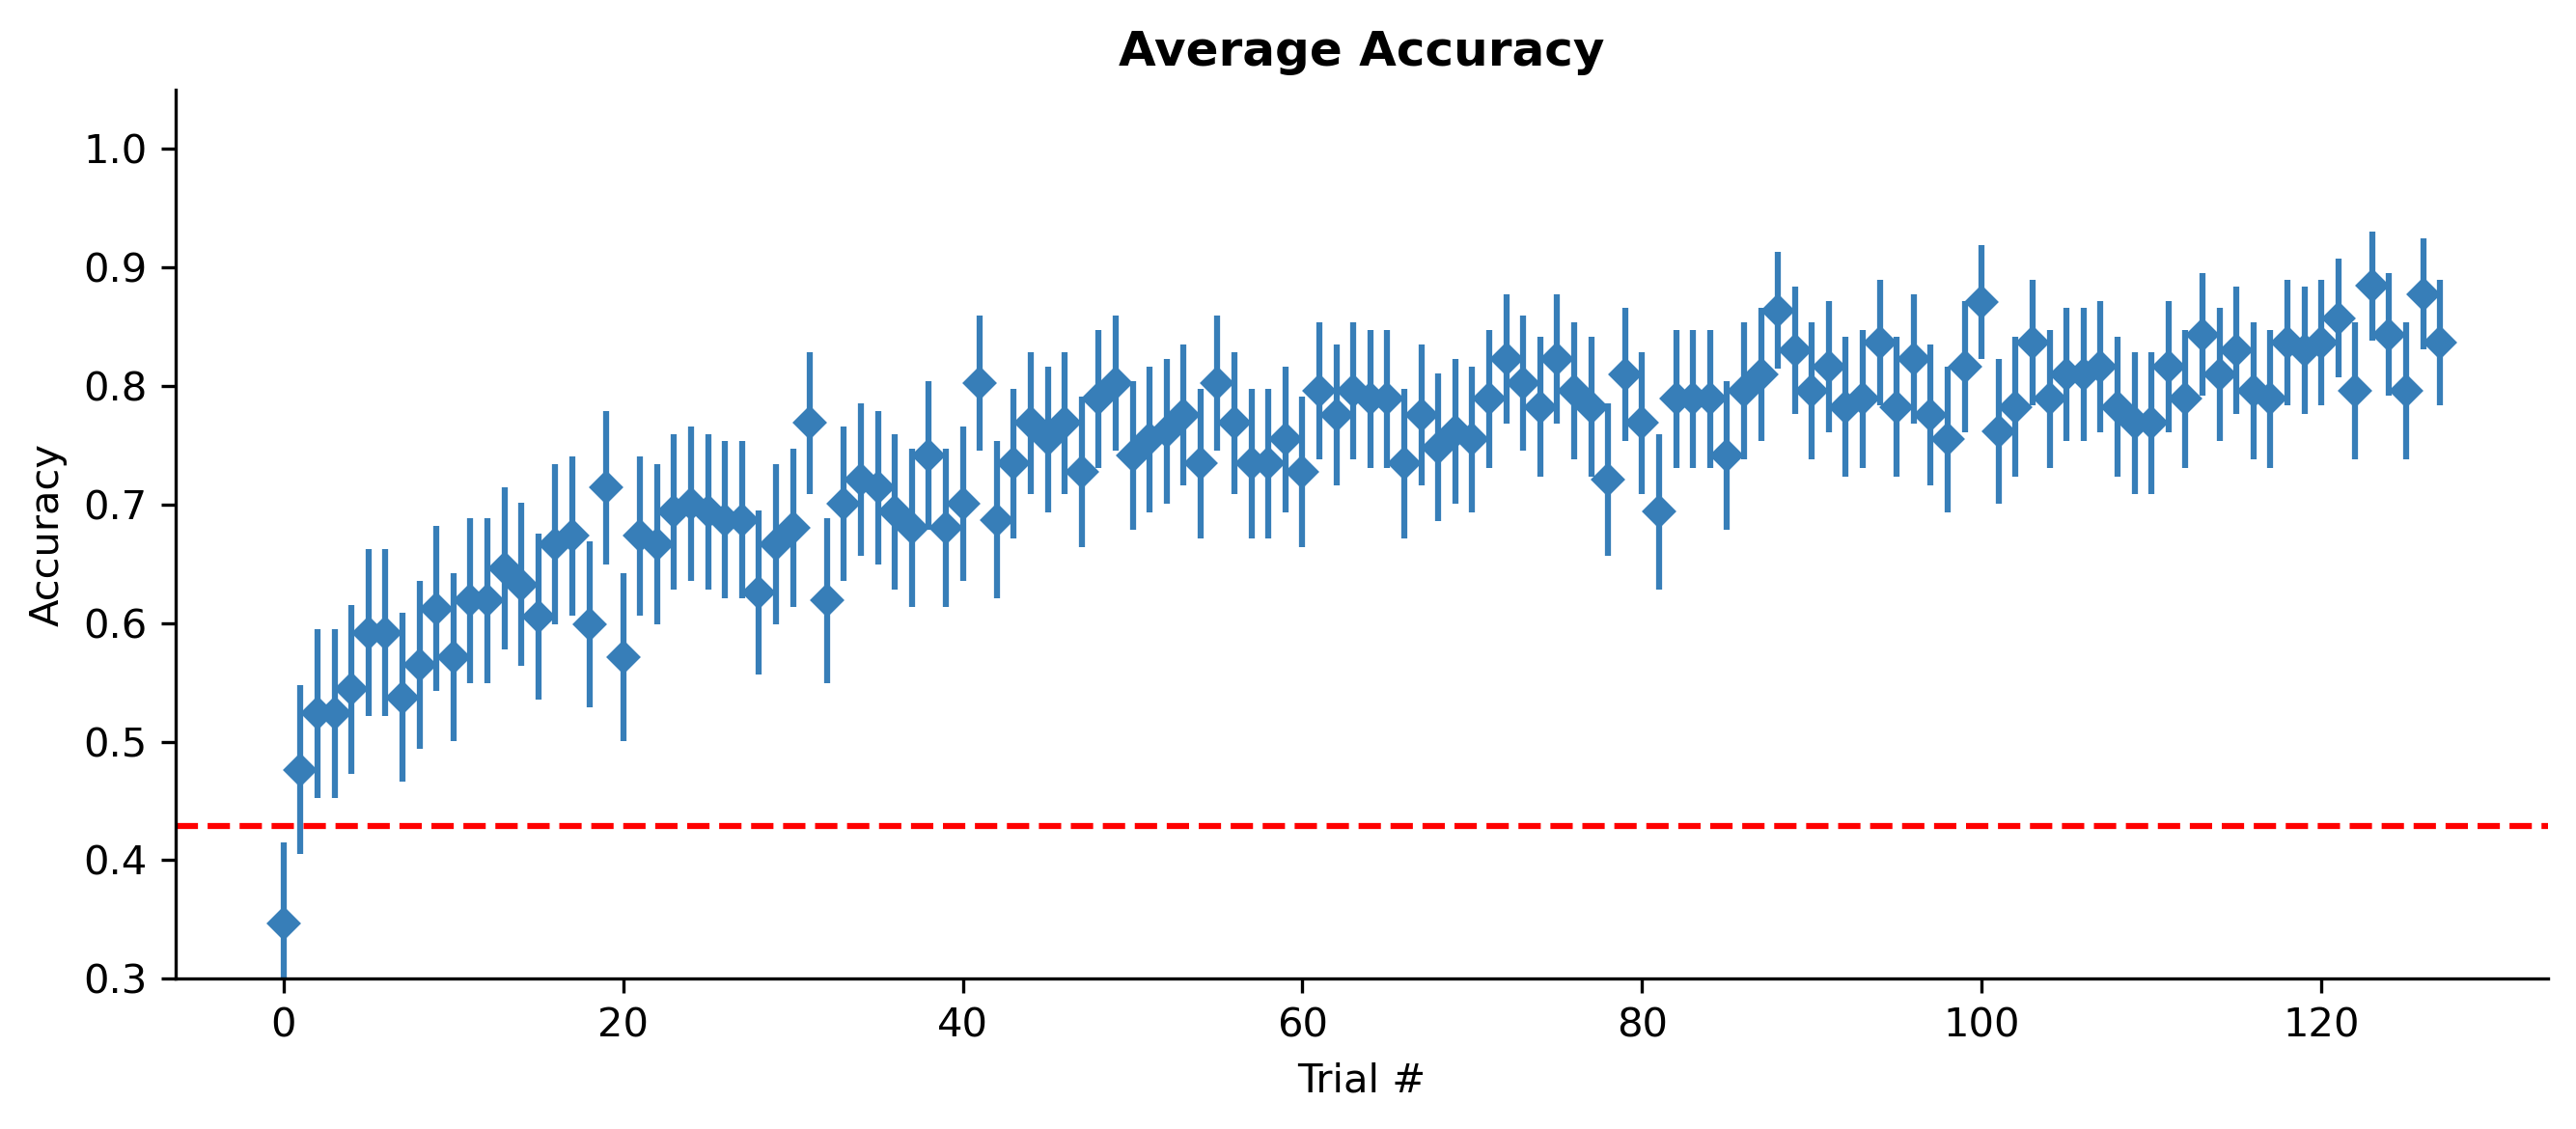

In [14]:
func_name = 'figures_new/fig_1_trials.svg'
fig_title = 'Average Accuracy'
chance_level = 9/21
plot_accuracy(ACCURACY_M_SUJS, ACCURACY_M, ACCURACY_SE,func_name,fig_title, chance_level= chance_level)


The same for the first property

In [15]:
subj_acc_first = acc_first_prop_trials
mean_acc_first = np.mean(subj_acc_first, axis=0)
se_acc_first = np.sqrt(mean_acc_first*(1-mean_acc_first))/np.sqrt(n_sujs)
se_acc_first.shape

(128,)

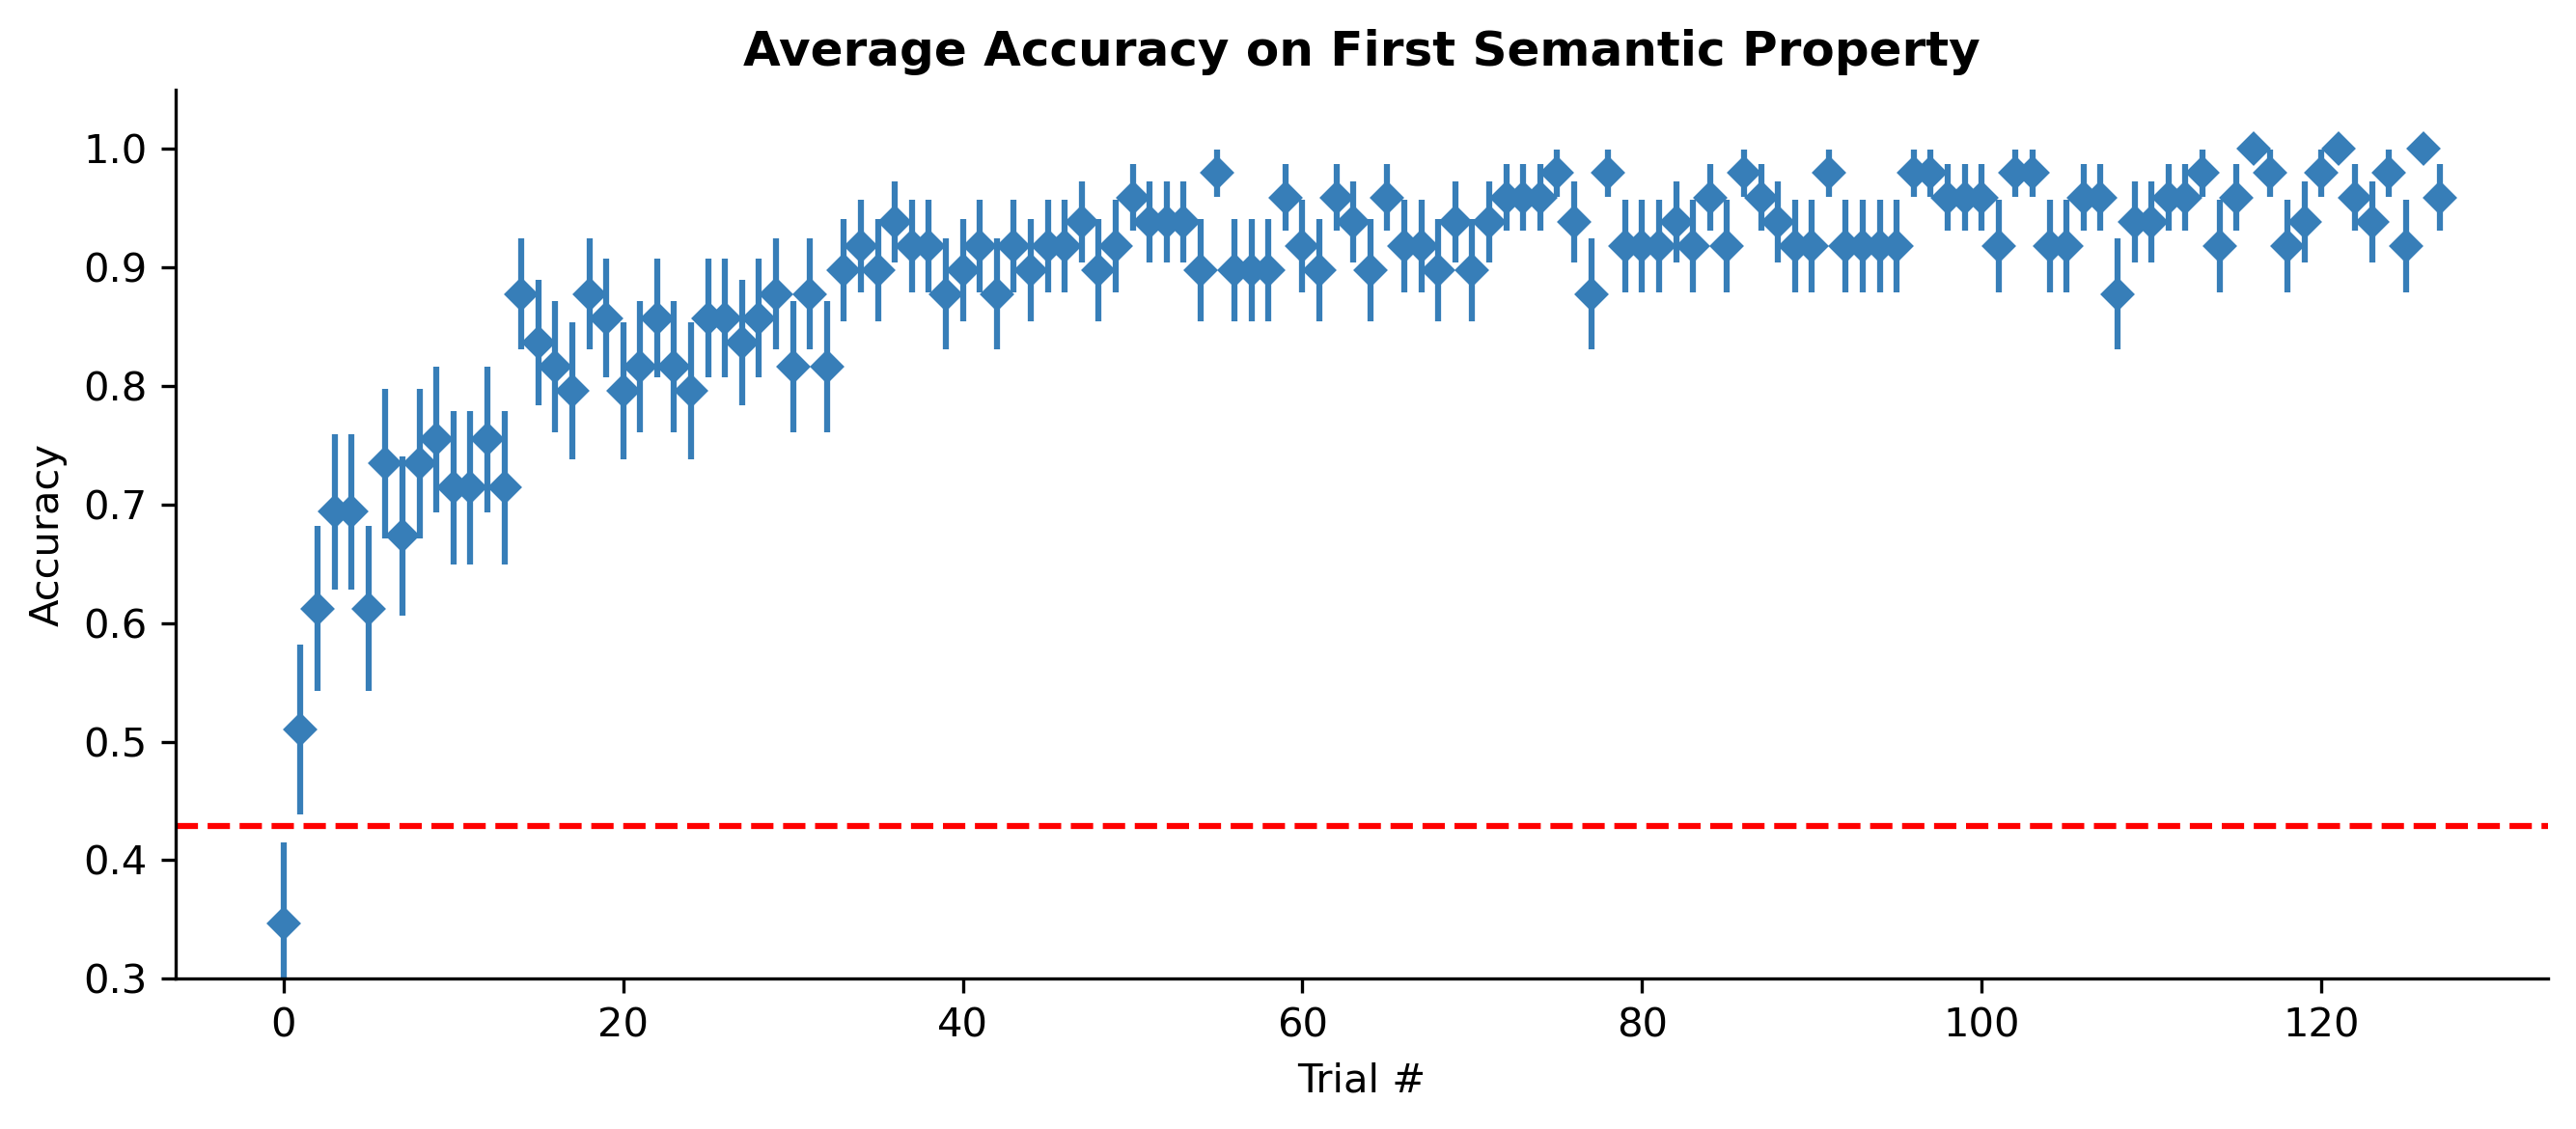

In [71]:
func_name = 'figures_new/fig_2_trials.svg'
fig_title = 'Average Accuracy on First Semantic Property'
chance_level = 3/7
plot_accuracy(subj_acc_first, mean_acc_first, se_acc_first, func_name, fig_title, chance_level=chance_level)

In [16]:
subj_acc_second = acc_second_prop_trials
mean_acc_second = np.mean(subj_acc_second, axis=0)
se_acc_second = np.sqrt(mean_acc_second*(1-mean_acc_second))/np.sqrt(n_sujs)
mean_acc_second.shape

(128,)

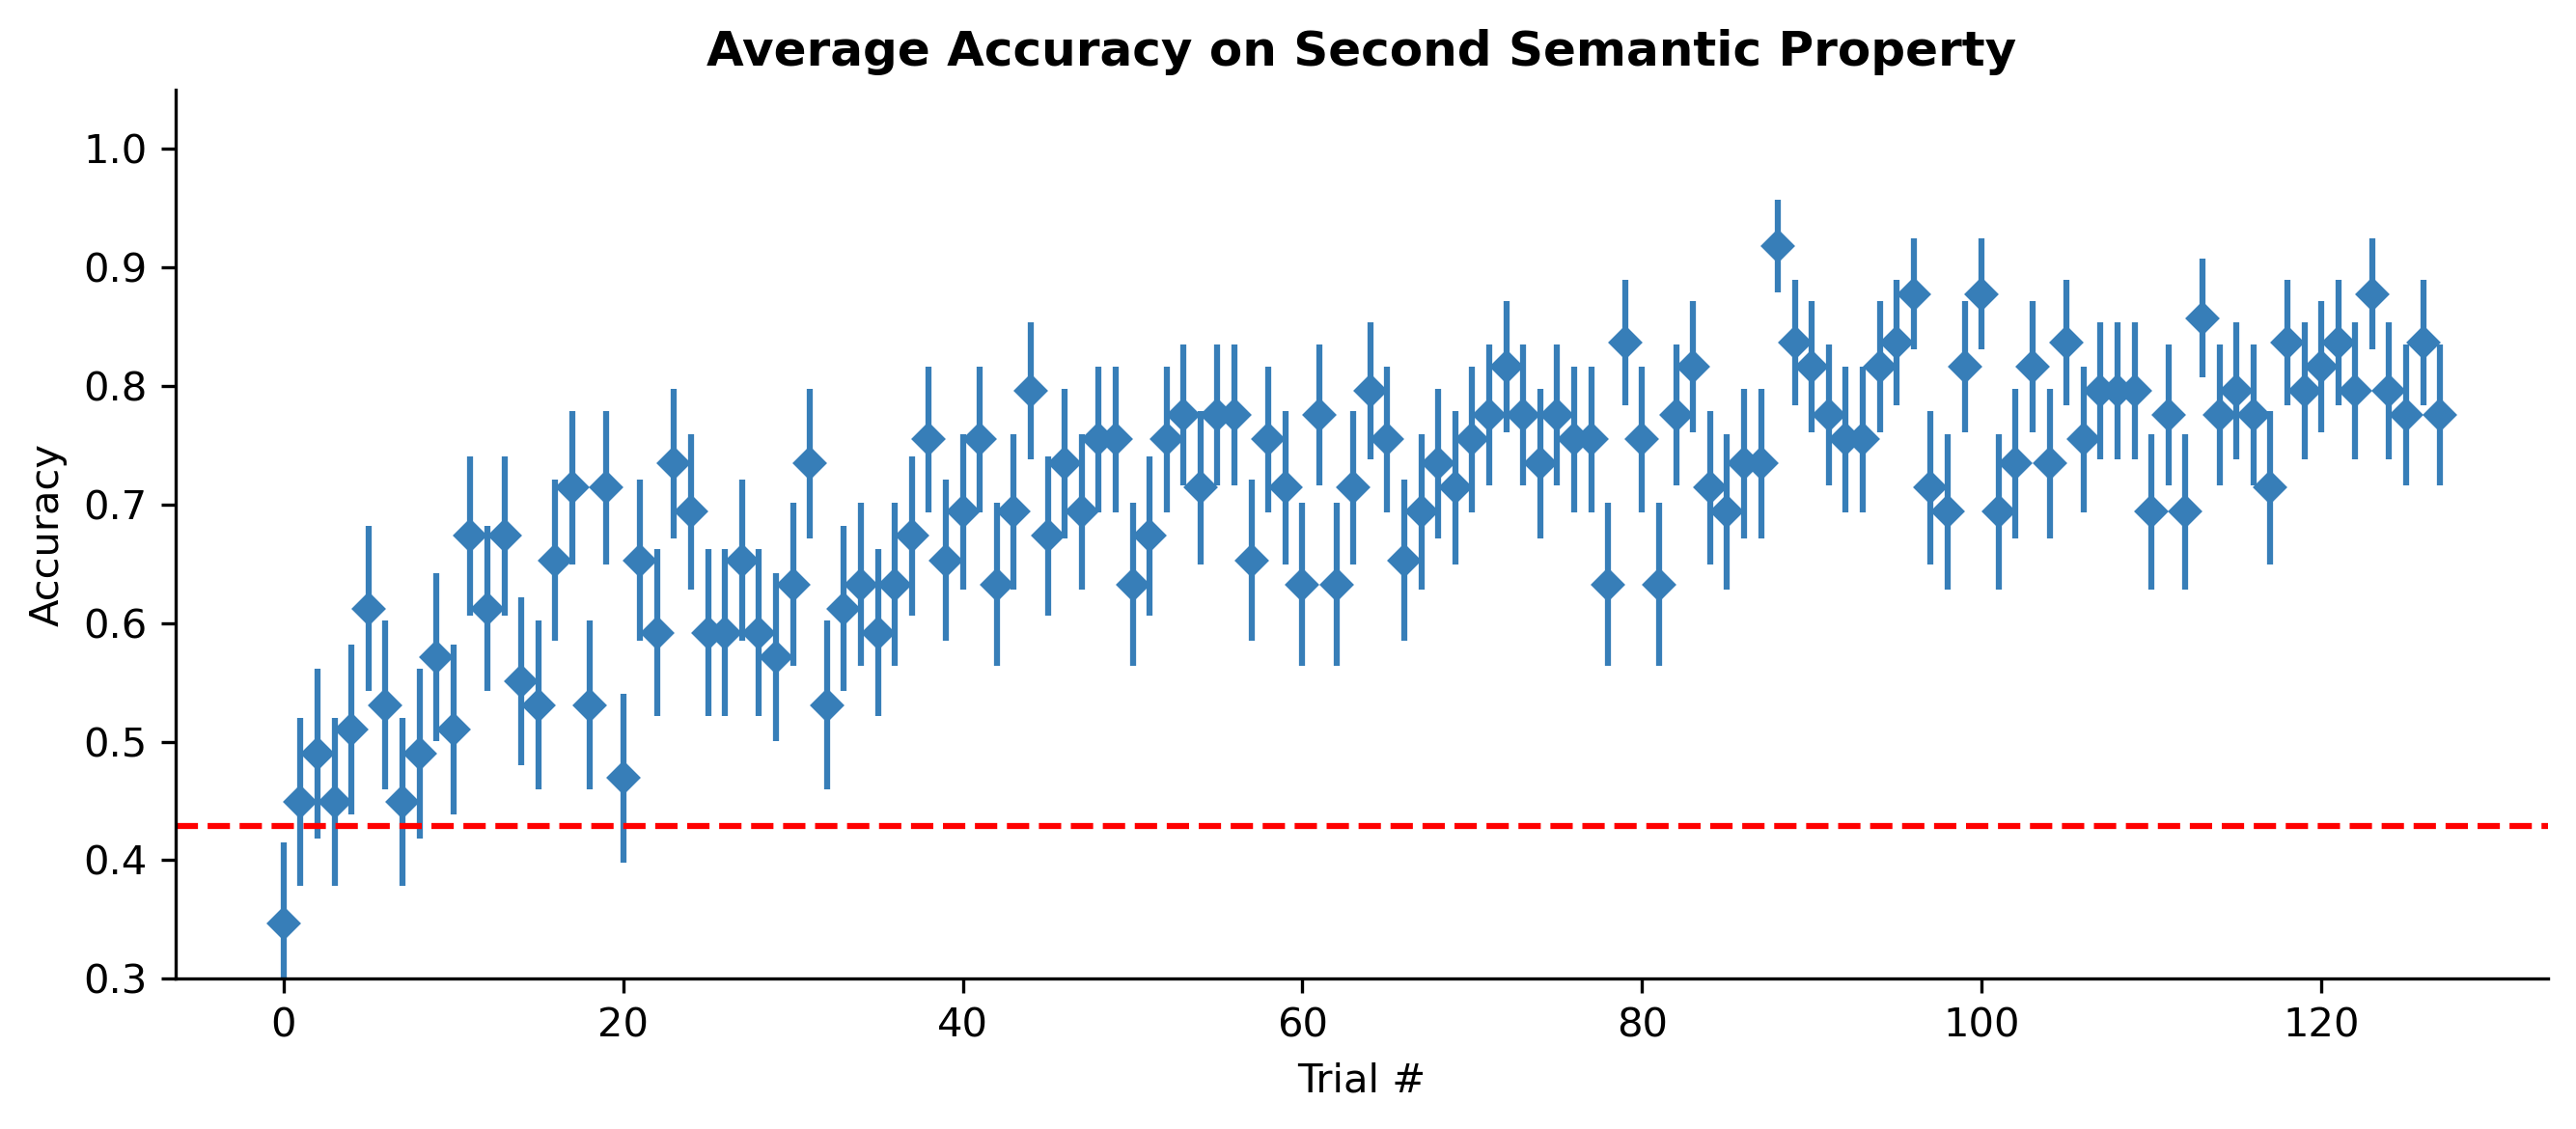

In [74]:
func_name = 'figures_new/fig_3_trials.svg'
fig_title = 'Average Accuracy on Second Semantic Property'
chance_level = 3/7
plot_accuracy(subj_acc_second, mean_acc_second, se_acc_second, func_name, fig_title, chance_level=chance_level)

Third distinction

In [17]:
subj_acc_third = acc_third_prop_trials
mean_acc_third = np.mean(subj_acc_third, axis=0)
se_acc_third = np.sqrt(mean_acc_third*(1-mean_acc_third))/np.sqrt(n_sujs)
mean_acc_third.shape

(128,)

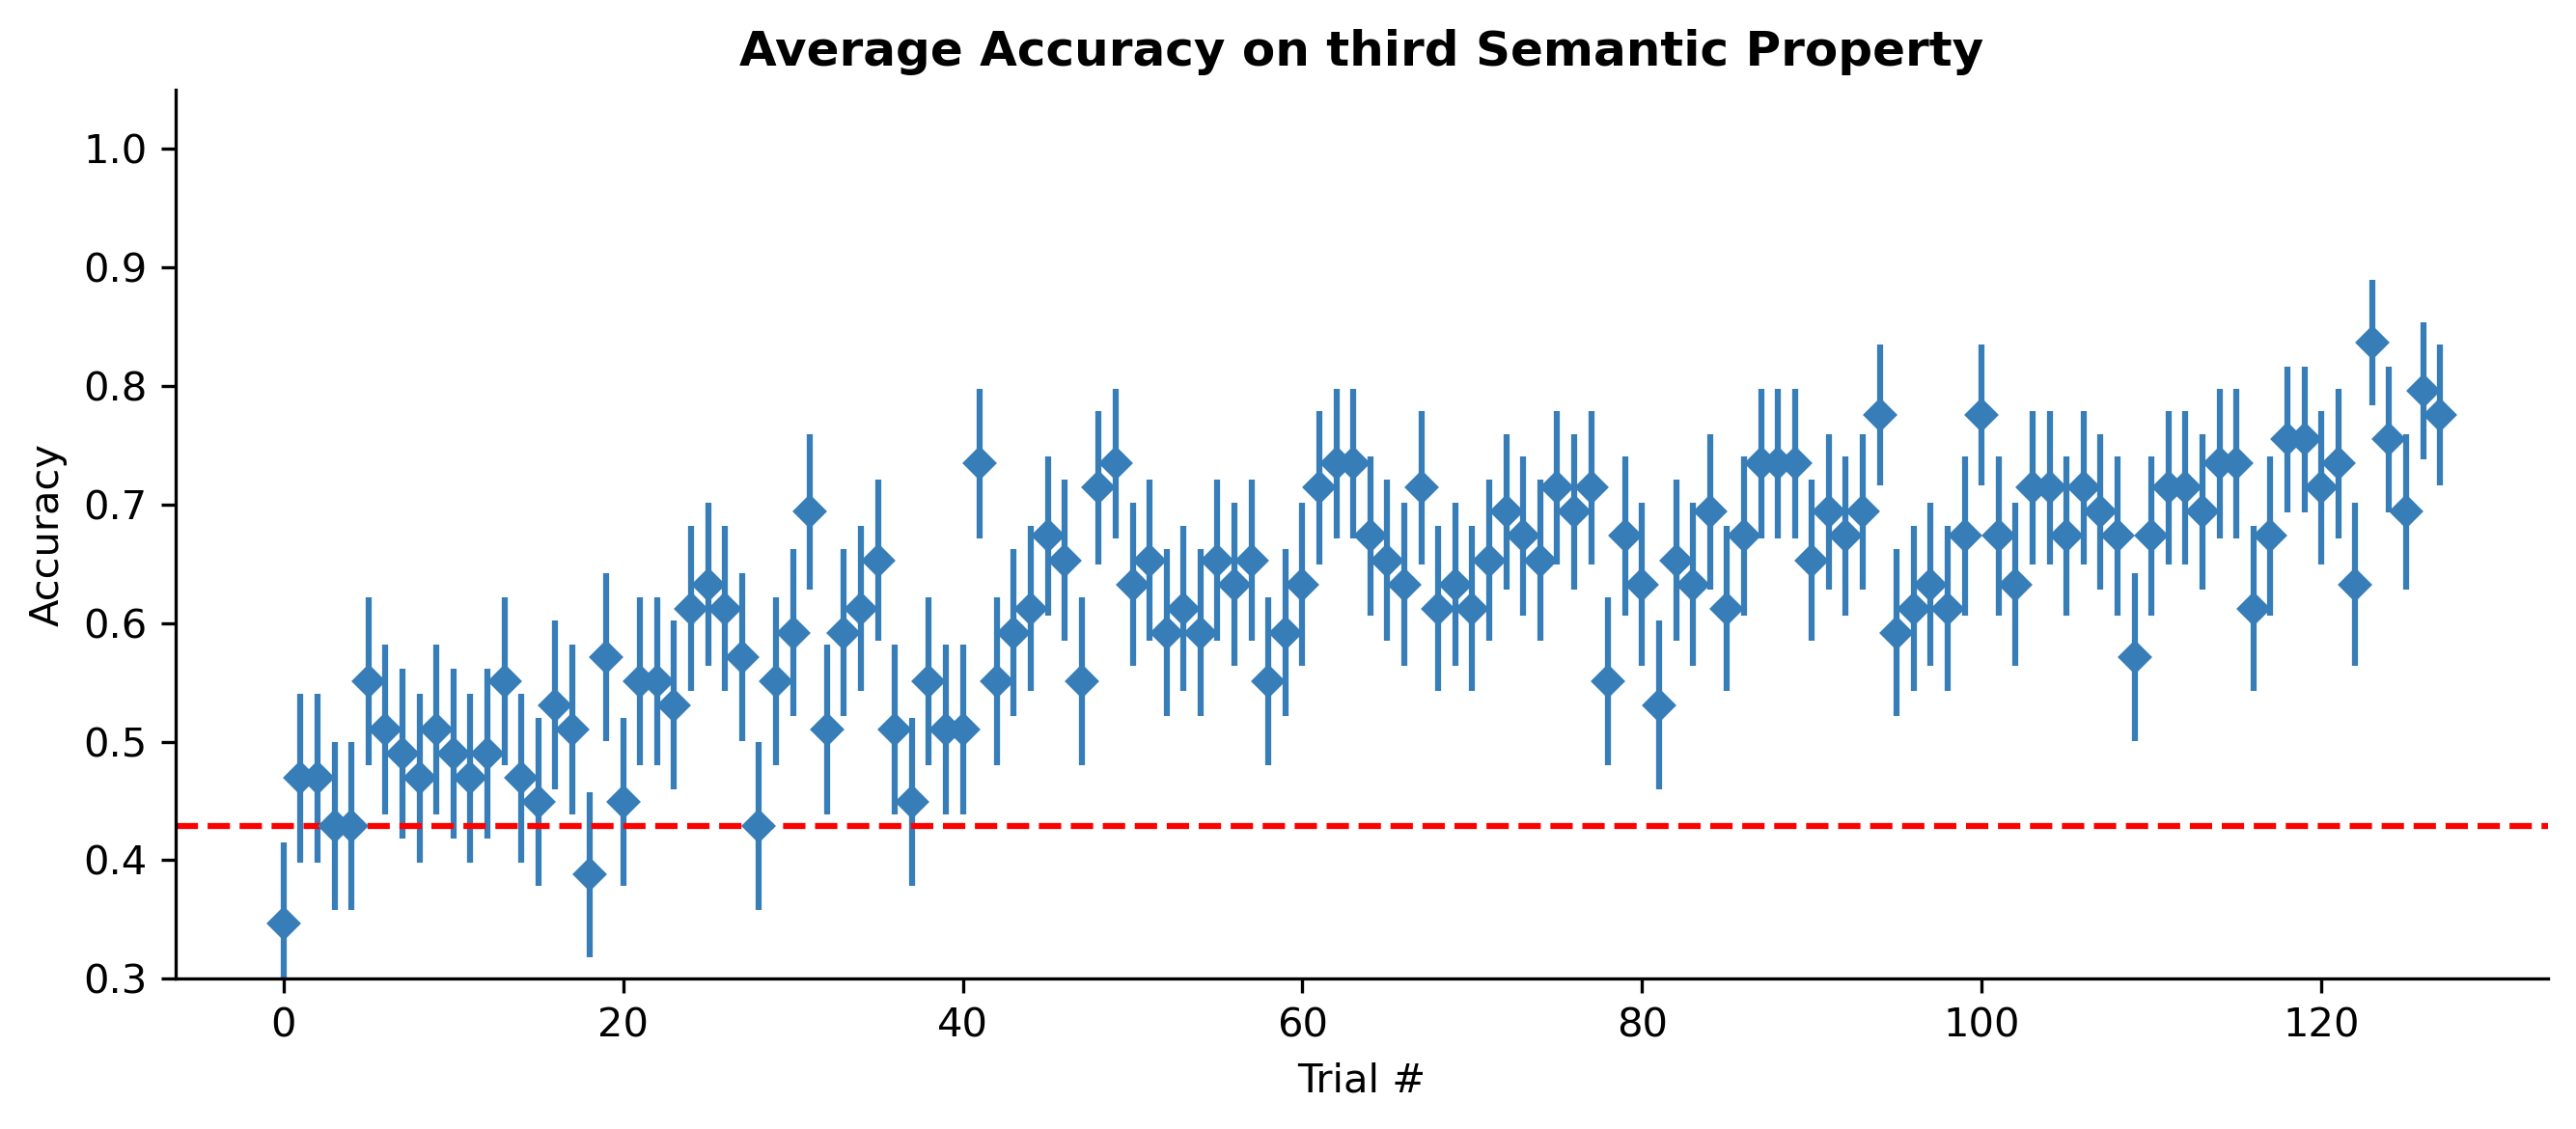

In [76]:
# Define figure
func_name = 'figures_new/fig_4_trials.svg'
fig_title = 'Average Accuracy on third Semantic Property'
chance_level = 3/7
plot_accuracy(subj_acc_third, mean_acc_third, se_acc_third, func_name, fig_title, chance_level=chance_level)

In [18]:
from matplotlib.transforms import Transform


def plot_accuracy_all_dist(block_mean_list, block_se_list, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    color_list = ['#fd7f6f', '#bd7ebe', '#8bd3c7']
    marker_list = ['o', 'D', 's']

    offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
    trans = plt.gca().transData
    tran_list = [-8, 0, 8]

    # label list
    label_list = ["First Property", "Second Property", "Third Property"]

    # Average per bloc
    for j, means in enumerate(block_mean_list):
        ax.errorbar(
            x = np.arange(0, n_trials),
            y = block_mean_list[j],
            yerr = block_se_list[j],
            color = color_list[j],
            markersize = 5,
            marker =  marker_list[j],
            alpha = 1,
            # linestyle='',
            # transform= trans+offset(tran_list[j]),
            label = label_list[j]
        )
            
        # ax.fill_between(np.arange(0, n_trials), 
        #                         block_mean_list[j] - block_se_list[j], 
        #                         block_mean_list[j] + block_se_list[j],
        #                         alpha=0.2,color = color_list[j]
        #                         )

    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )

    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Trial #')
    ax.set_ylabel('Accuracy')

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # legend
    leg = ax.legend(loc=(.75, .1))

    plt.tight_layout()
    fig.savefig(fig_name)

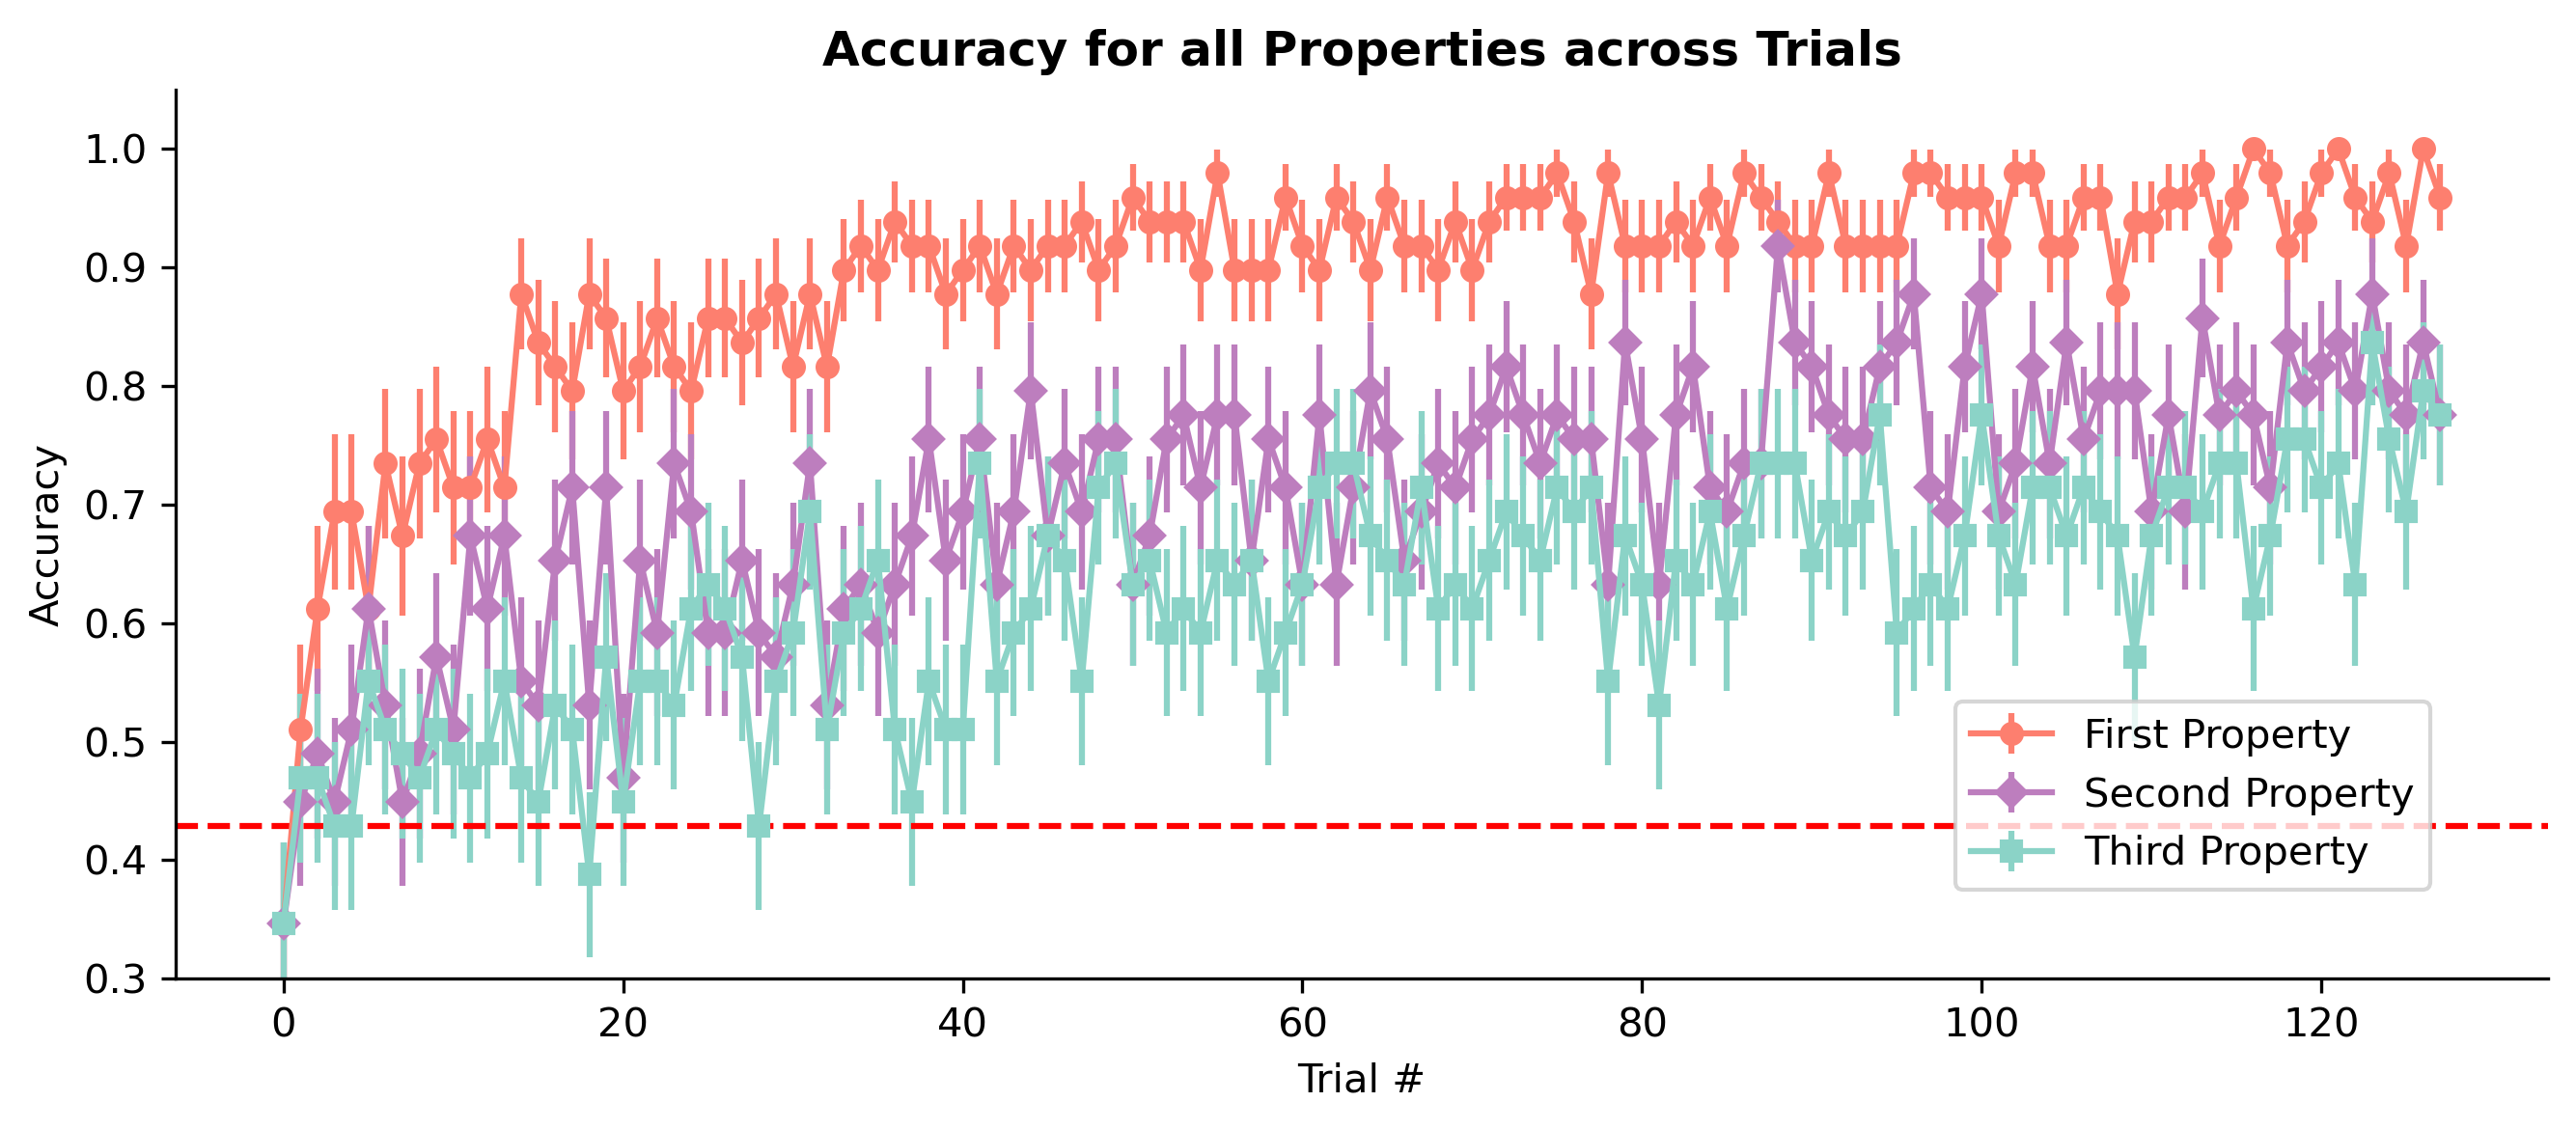

In [19]:
mean_list = [mean_acc_first, mean_acc_second, mean_acc_third]
se_list   = [se_acc_first, se_acc_second, se_acc_third]
plot_accuracy_all_dist(mean_list, se_list, "figures_new/combined_properties_trials.svg", "Accuracy for all Properties across Trials", chance_level=3/7)